Title of ML project: Predictive Modeling of Joint Current for Fault Detection and Performance Optimization in Robotic Systems
Name SRUTHI S L
Organization: Entri Elevate 
Date:

 1. Overview of Problem Statement:
The growing adoption of collaborative robots (cobots) in industrial applications demands strict adherence to safety standards to protect human operators during Human-Robot Collaboration (HRC). Current industry regulations mandate continuous online monitoring of cobot speed, joint current and temperatures and the maintenance of a safe separation distance, especially when robots operate at high speeds, handle heavy loads, or utilize dangerous tools. These measures are critical for minimizing the risk of accidents and ensuring workplace safety. By integrating predictive analytics into the scope of online monitoring, cobot systems can move from reactive safety measures to proactive fault detection and safe stop prediction.
This project addresses employing regression analysis of joint current in the UR3 cobot system. Joint currents, which serve as vital indicators of robotic health, can signal potential failures or inefficiencies before they escalate into critical issues. The aim is to enhance the predictive capabilities of existing systems, facilitating fault detection, safe stop implementation, and overall operational optimization. The project aims to enhance the reliability and functionality of cobots in modern industrial environments by combining safety compliance with advanced predictive maintenance.

Referece: Aliev, Khurshid, and Dario Antonelli. "Proposal of a monitoring system for collaborative robots to predict outages and to assess reliability factors exploiting machine learning." Applied Sciences 11.4 (2021): 1621.

 2. Objective:
To predict the operational parameter,joint current,for fault detection and optimization of colloborative robots.

 3.Data Description:
Source: https://archive.ics.uci.edu/dataset/963/ur3+cobotops
Features: 1. Current_J0	
          2. Temperature_T0	
          3. Current_J1	
          4. Temperature_J1	
          5. Current_J2	
          6. Temperature_J2	
          7. Current_J3	
          8. Temperature_J3	
          9. Speed_J0	
          10. Speed_J1	
          11. Speed_J2	
          12. Speed_J3	
          13. Speed_J4	
          14. Speed_J5	
          15. Tool_current	
          16. cycle	
          17. Robot_ProtectiveStop	
          18. grip_lost

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

 4. Data Collection:
 Import the dataset from the specified source.- Gain insights into the data distribution, relationships, and potential patterns.

In [2]:
data=pd.read_excel('UR3_Cobot.xlsx')

In [3]:
data

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26T15:36:02.555Z,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,7406,2022-10-26T15:36:03.562Z,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,7407,2022-10-26T15:36:04.571Z,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,7408,2022-10-26T15:36:05.572Z,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [4]:
columns=['Current_J0','Temperature_T0','Current_J1','Temperature_J1','Current_J2','Temperature_J2','Current_J3','Temperature_J3','Speed_J0','Speed_J1','Speed_J2','Speed_J3','Speed_J4','Speed_J5','Tool_current','cycle ','Robot_ProtectiveStop','grip_lost']

In [5]:
df=data[columns]

In [6]:
df

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [7]:
df.head(15)

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,2.955651e-01,-0.000490,0.001310,-1.328356e-01,-7.478529e-03,-1.529622e-01,0.082732,1,0.0,False
1,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-7.391485e-30,-0.000304,0.002185,1.668227e-03,-7.668273e-04,4.169016e-04,0.505895,1,0.0,False
2,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,1.369386e-01,0.007795,-2.535874,3.798670e-01,4.545622e-04,-4.968559e-01,0.079420,1,0.0,False
3,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-9.030032e-02,-0.004911,-0.009096,-3.841961e-01,1.841084e-02,4.255591e-01,0.083325,1,0.0,False
4,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,1.268088e-01,0.005567,0.001138,-3.532840e-01,1.499380e-02,1.809886e-01,0.086379,1,0.0,False
5,0.118961,27.8125,-2.162542,29.3750,-1.211779,29.4375,-0.481834,32.1875,-4.639511e-05,0.000093,0.000262,2.170784e-03,2.647067e-04,-2.470161e-03,0.188310,1,0.0,False
6,0.086138,27.8750,-1.757647,29.3750,-0.960634,29.4375,-0.488380,32.1875,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.121039e-44,0.085192,1,0.0,False
7,0.075657,27.8750,-1.836465,29.3750,-0.961322,29.4375,-0.512541,32.1875,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.087058,1,0.0,False
8,-0.186848,27.8750,-2.563738,29.3750,-1.418934,29.4375,-0.262015,32.1875,-1.660036e-01,0.002409,-0.015483,3.500632e-01,-9.985541e-03,-1.927102e-01,0.085785,1,0.0,False
9,-0.158912,27.8750,-1.750777,29.3750,-1.979400,29.4375,-0.184550,32.1875,9.832304e-02,0.004996,-0.016996,4.962411e-01,-1.735275e-02,-5.886860e-01,0.085020,1,0.0,False


In [8]:
df.describe()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
count,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000,7355.000000
mean,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241,0.037797
std,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340,0.190719
min,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000
25%,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000
50%,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000
75%,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000,0.000000
max,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000


The UR3 Cobot contain 18 features representing six joint currents, temperatures, speeds and robots' protective stop and grip lost.

5. Data Preprocessing- Data Cleaning:

In [9]:
# Checking null values
df.isnull().sum()

Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

In this dataset the values of all features of some specific rows are missing and the missing rows are 54. So removing these rows which is 0.7% of total data does not affect the dataset. But imputation techniques will cause complications and hide the relevant characteristics of dataset.

In [10]:
df_clean=df.dropna()

In [11]:
df_clean

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [12]:
# Setting the correct index
df_clean =df_clean.reset_index()

In [13]:
# Checking whether the null values are removed
df_clean.isnull().sum()

index                   0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
dtype: int64

In [14]:
# Checking duplicates 
df_clean.duplicated().sum()

np.int64(0)

In [15]:
num_columns=['Current_J0','Temperature_T0','Current_J1','Temperature_J1','Current_J2','Temperature_J2','Current_J3','Temperature_J3','Speed_J0','Speed_J1','Speed_J2','Speed_J3','Speed_J4','Speed_J5','Tool_current',]

In [16]:
df_outlier=df_clean[num_columns]

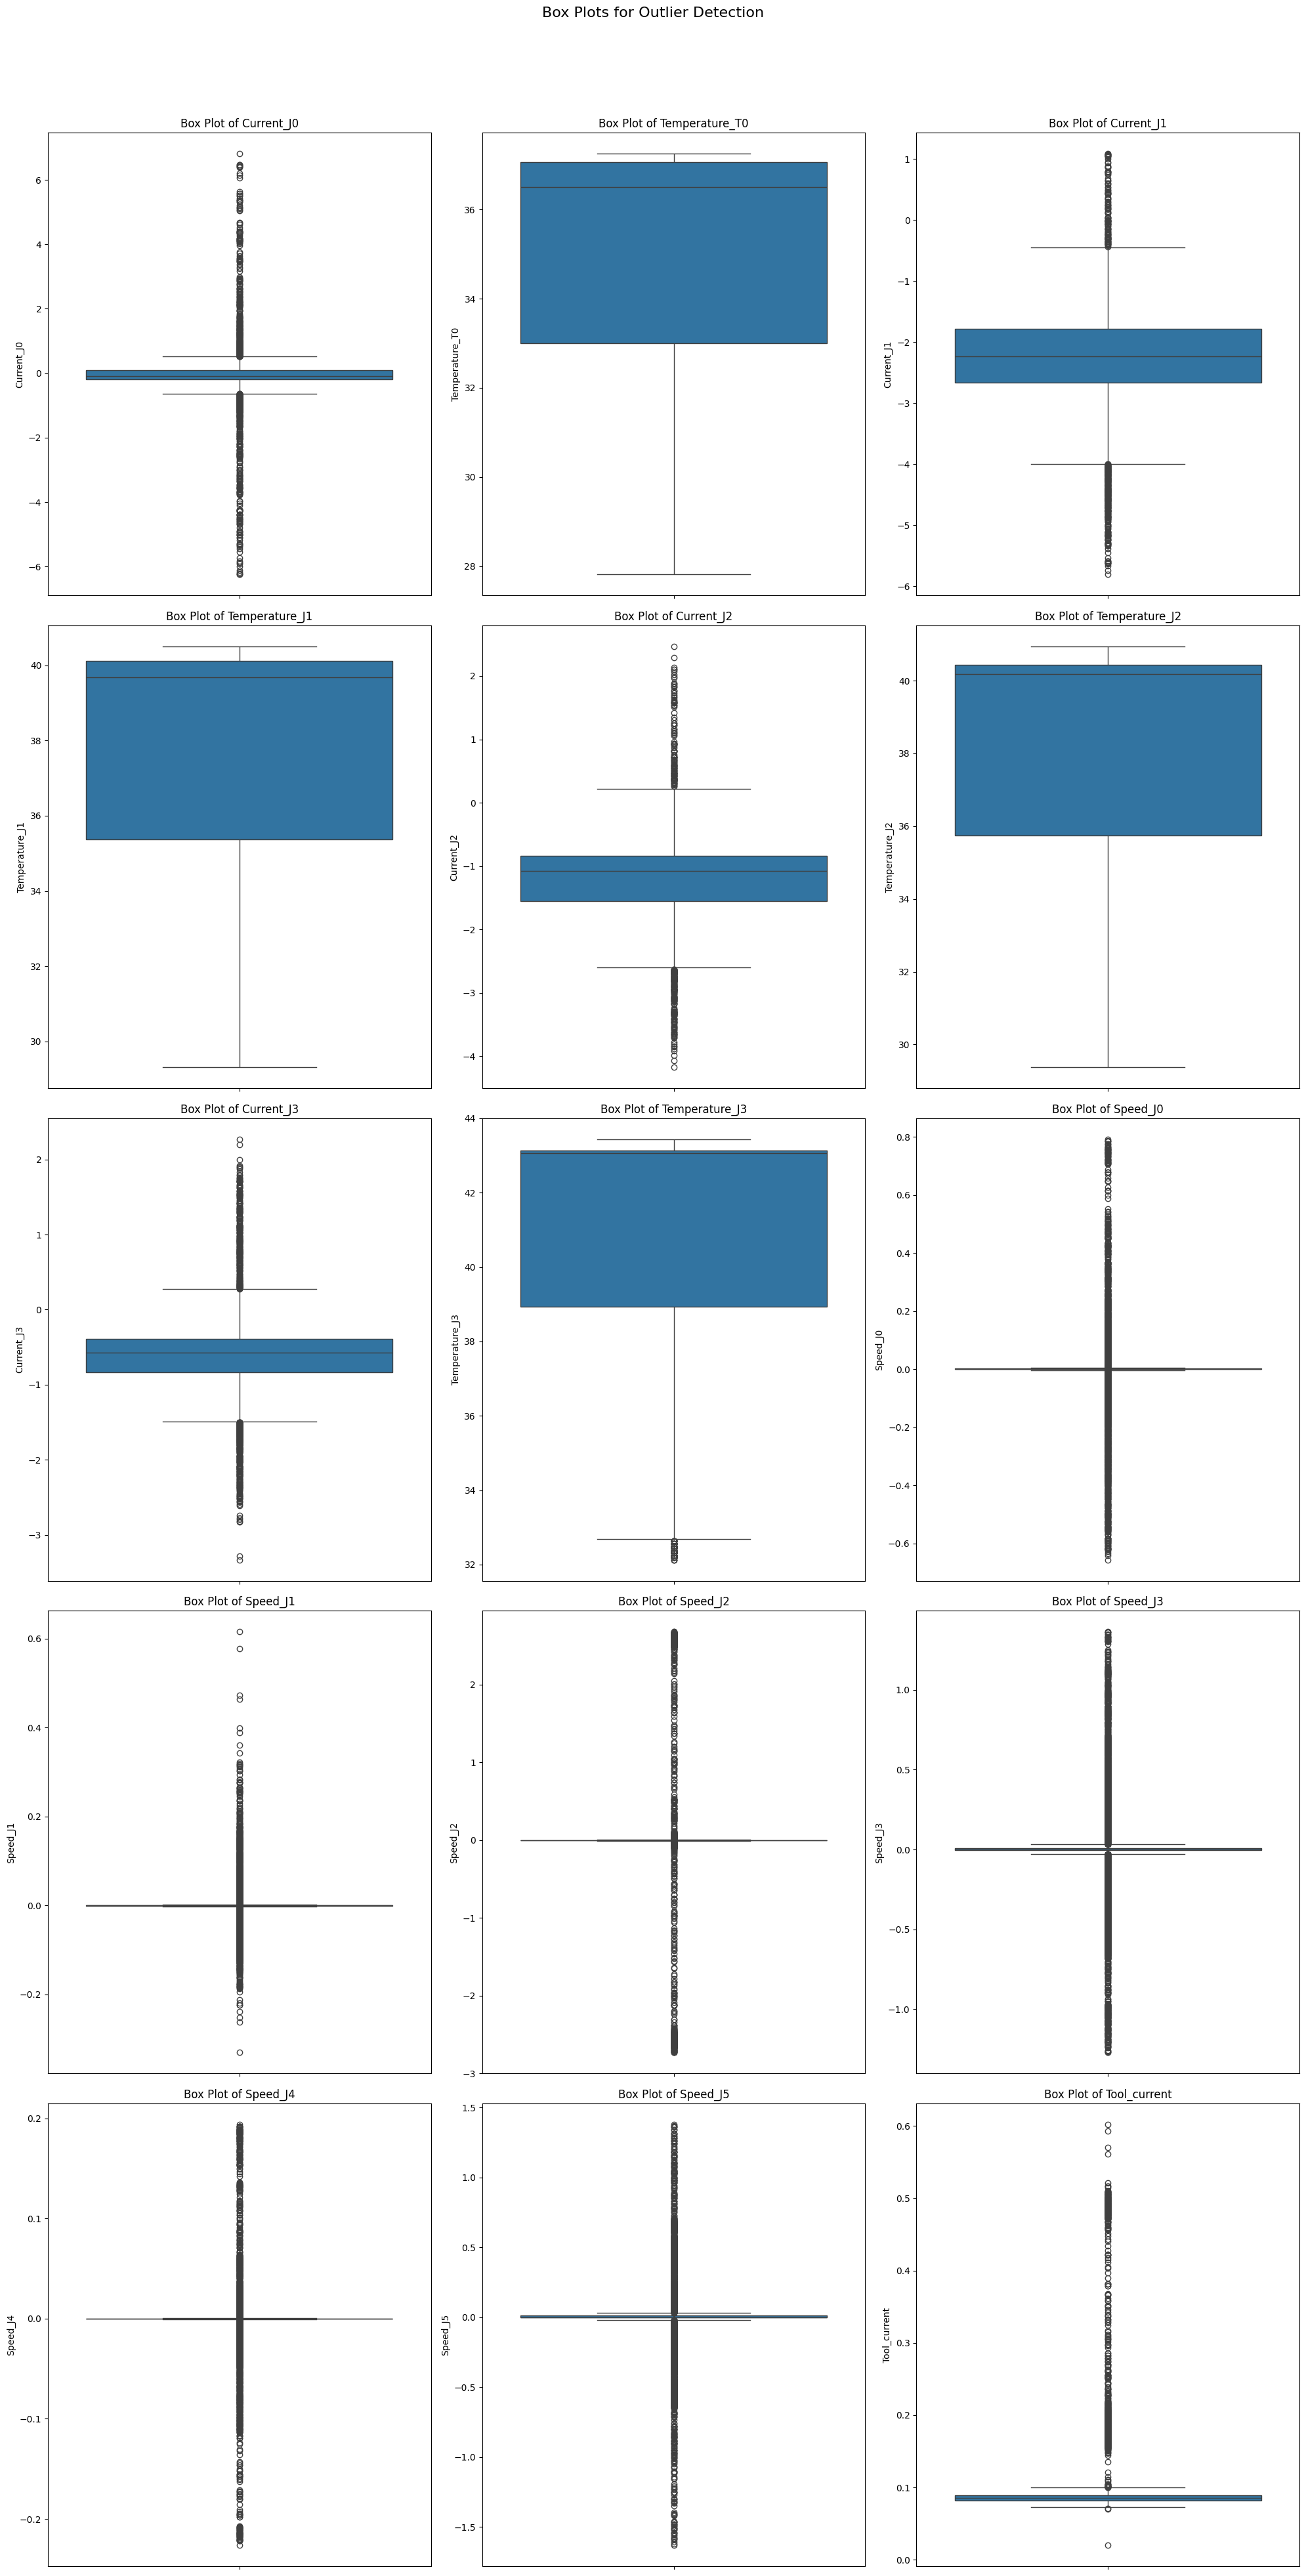

In [17]:
#Checking outliers for plotting box plot
# Set up the subplots: 2 rows, 2 columns for four subplots
fig, axes = plt.subplots(5,3 , figsize=(20, 40))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(df_outlier.columns):
    sns.boxplot(y=df_outlier[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust title spacing
plt.show()

Here the outliers represent actual variations in the robot’s performance (e.g., rapid movements, stops, or faults), 
so they are critical for understanding its behavior. Removing these would eliminate valuable insights about edge cases or anomalies.

 6. Exploratory Data Analysis (EDA):

Plotting histogram for gaining insights about the distribution of data

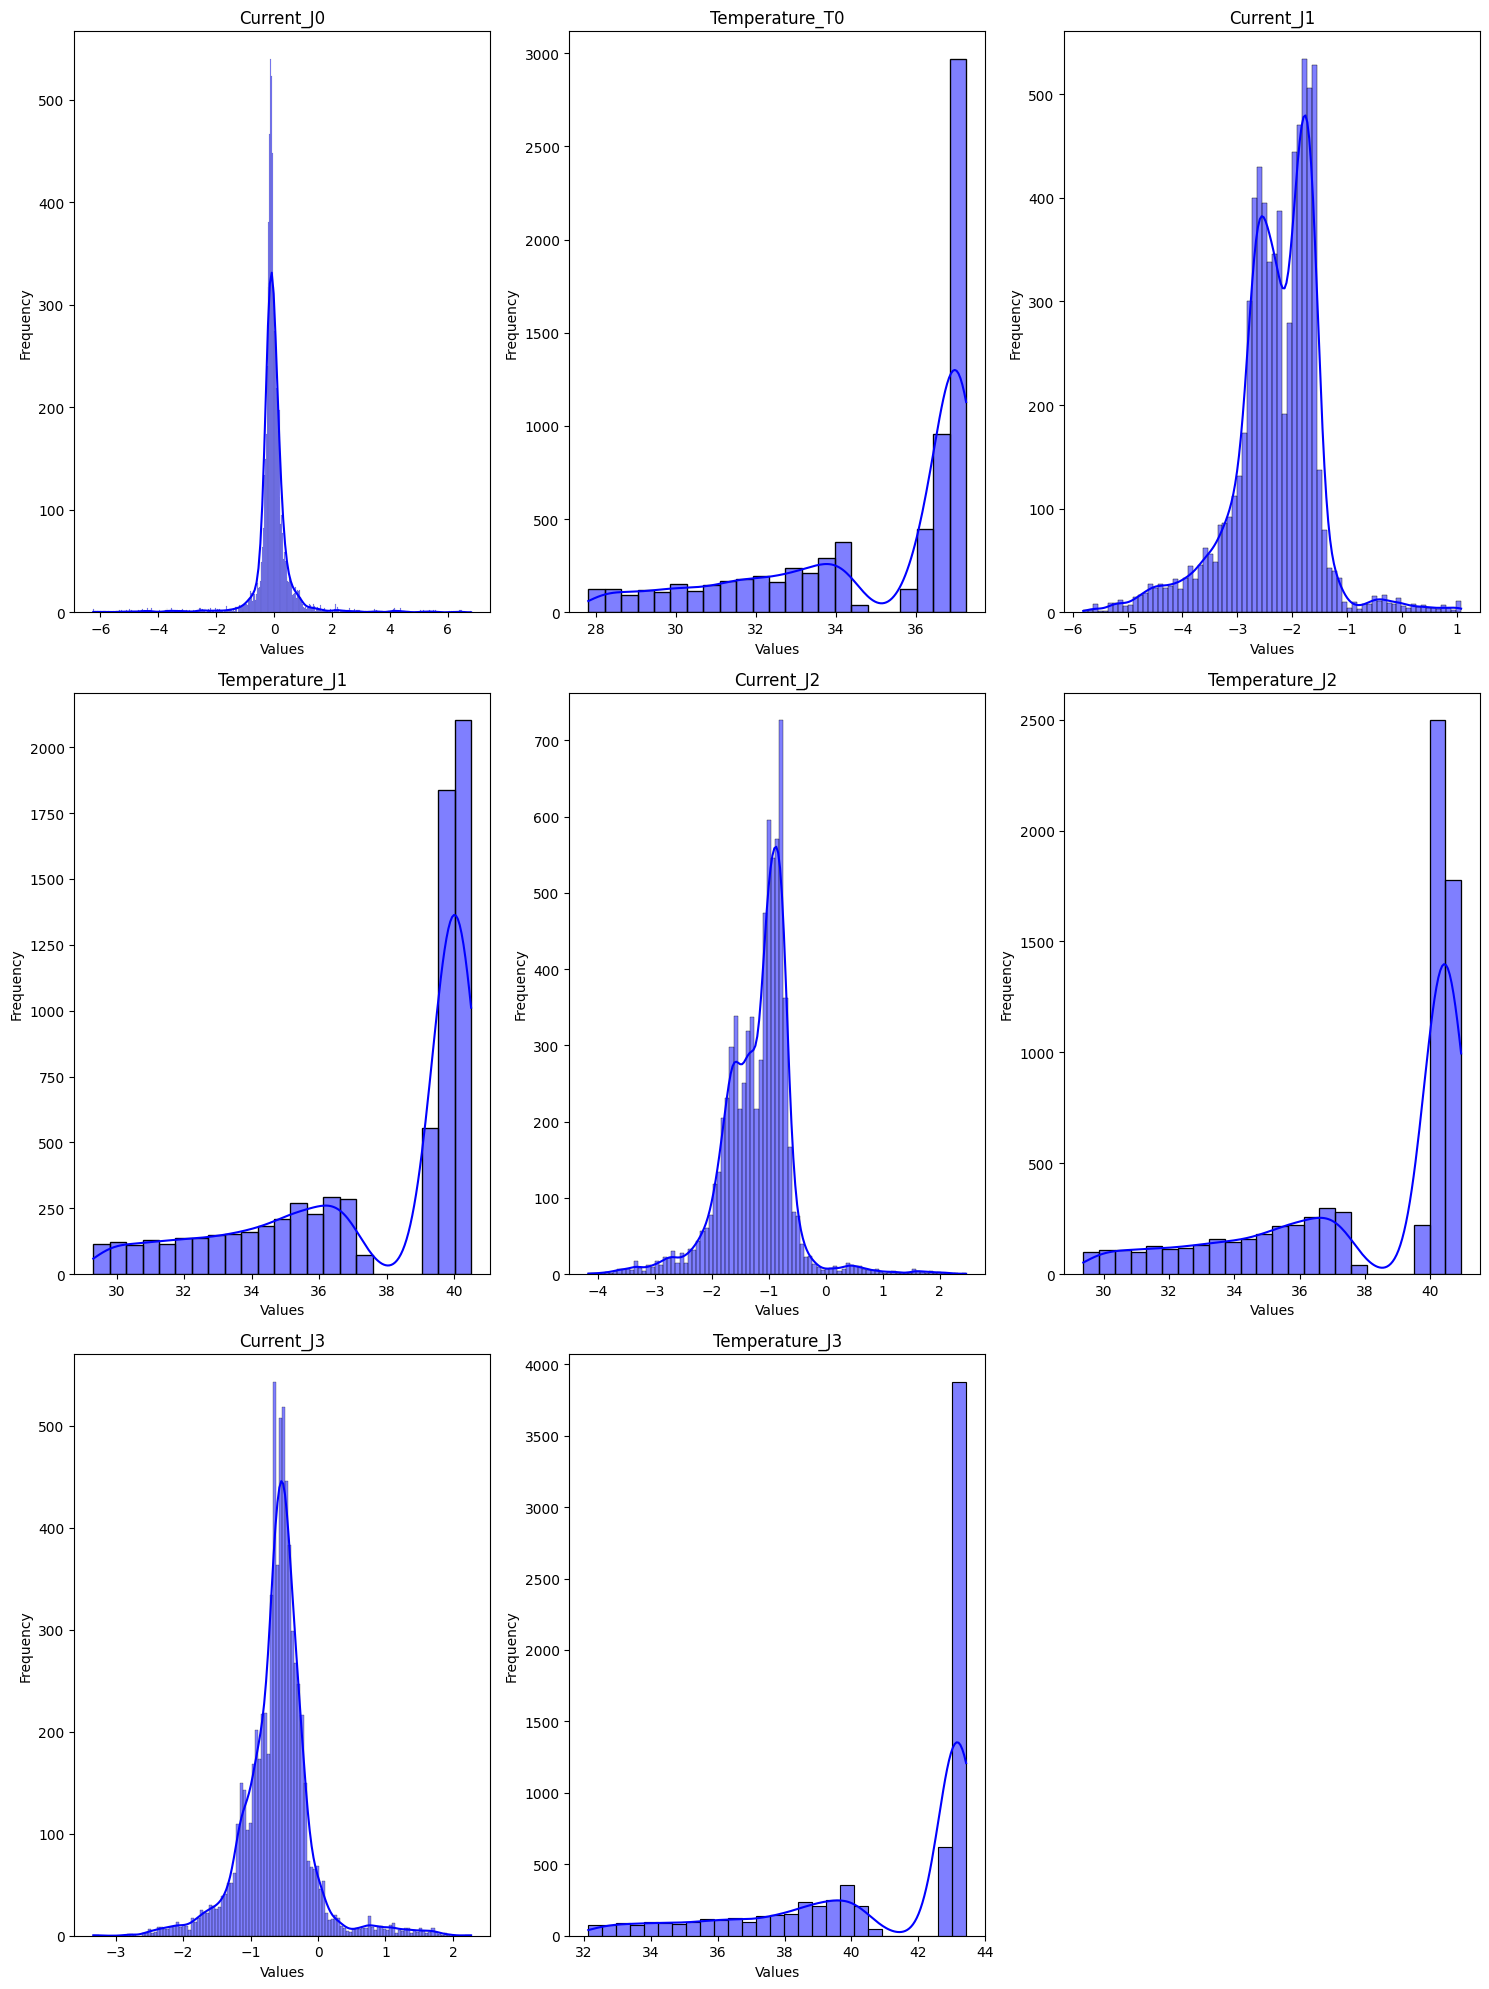

In [18]:
# List of columns to plot
columns_to_plot = [
    'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 
    'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3'
]

# Set up the plot grid
plt.figure(figsize=(15, 20))  # Adjust the figure size for better visualization
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns_to_plot) // n_cols)  # Calculate the number of rows needed

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(n_rows, n_cols, i)  # Create a subplot in the grid
    sns.histplot(df_clean[column], kde=True, color='blue')  # Plot histogram with density curve
    plt.title(column)  # Add title
    plt.xlabel('Values')  # X-axis label
    plt.ylabel('Frequency')  # Y-axis label

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

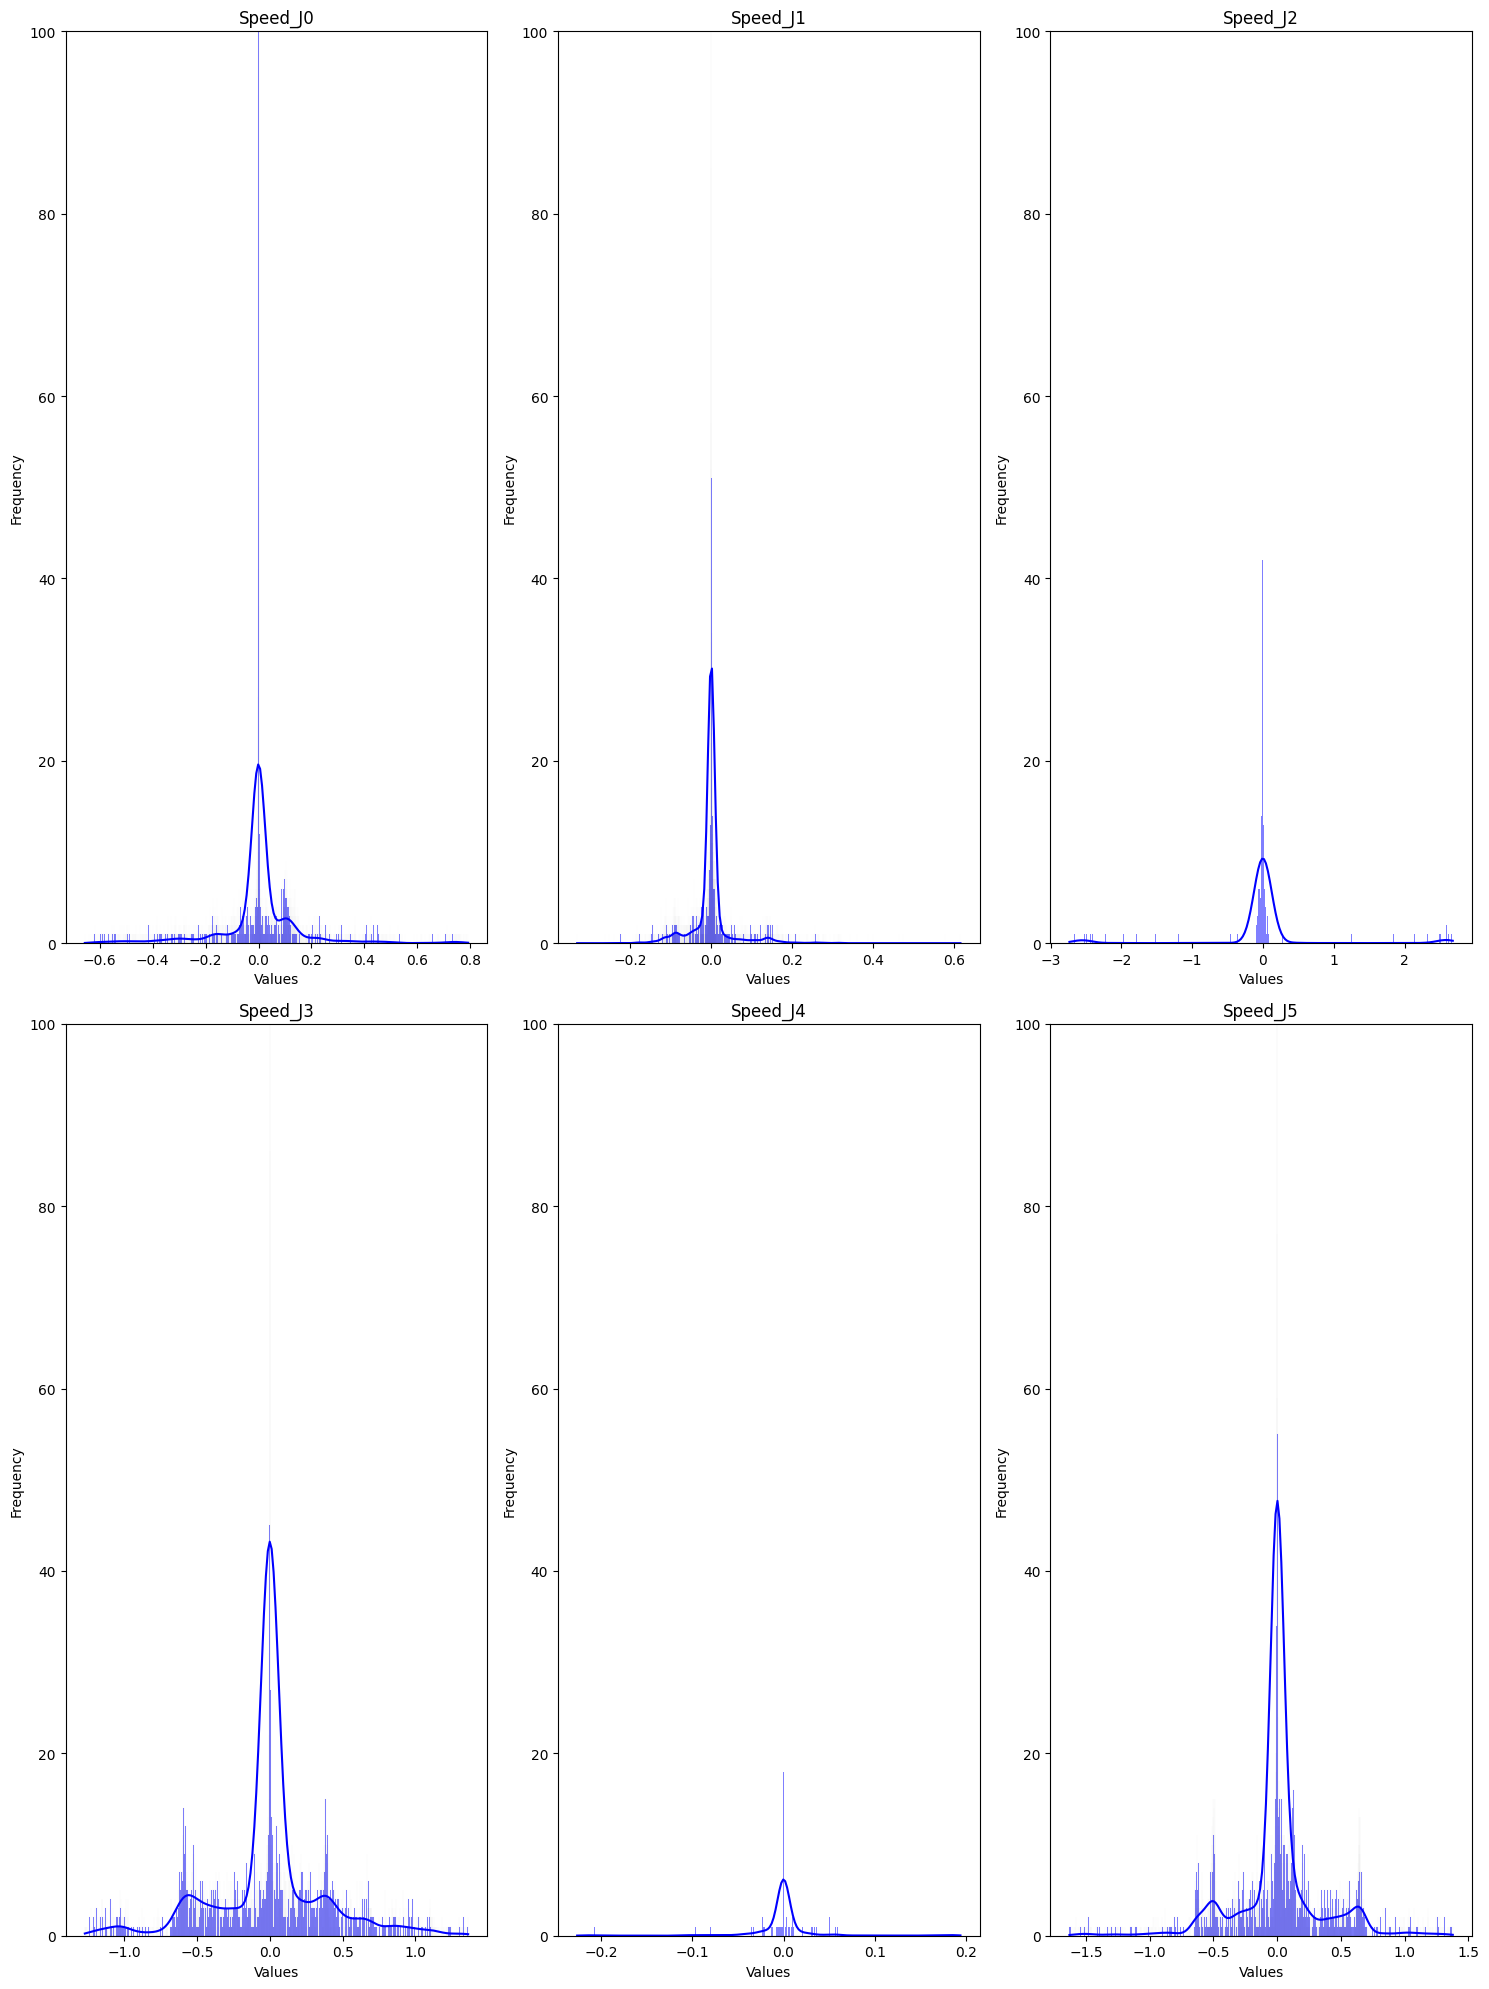

In [19]:
# List of columns to plot
columns_to_plot = ['Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5']

# Set up the plot grid
plt.figure(figsize=(15, 20))  # Adjust the figure size for better visualization
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns_to_plot) // n_cols)  # Calculate the number of rows needed

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(n_rows, n_cols, i)  # Create a subplot in the grid
    sns.histplot(df_clean[column], kde=True, color='blue')  # Plot histogram with density curve
    plt.title(column)  # Add title
    plt.xlabel('Values')  # X-axis label
    plt.ylabel('Frequency')
    plt.ylim(0,100)# Y-axis label

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The distribution plot shows that joint currents are approximately normally distributed and in case of joint speeds there are outliers which represent the robots' working. The joint speed will be zero when it cobots stop working and will be higher if there are any faulty movements

In [20]:
# Correlation
correlation=df_clean.corr()

In [21]:
correlation

,index,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
index,1.000000,-0.008207,0.900373,-0.018240,0.895731,-0.012321,0.887082,-0.002413,0.869505,-0.003038,0.000419,-0.002345,0.012746,0.008192,-0.010616,0.005218,0.995071,0.059771,-0.059416
Current_J0,-0.008207,1.000000,-0.009314,0.022532,-0.009484,0.058976,-0.009825,-0.314995,-0.009981,0.043615,-0.226628,0.356381,-0.244565,-0.008498,0.261849,0.053898,-0.007991,0.018110,0.012481
Temperature_T0,0.900373,-0.009314,1.000000,-0.023205,0.999462,-0.019163,0.998795,-0.006077,0.996209,0.001965,0.000749,-0.000443,0.004419,0.002351,-0.004765,0.001704,0.918589,0.058720,-0.087198
Current_J1,-0.018240,0.022532,-0.023205,1.000000,-0.023018,0.665123,-0.022582,0.389860,-0.022531,0.391095,0.091001,-0.083808,-0.179593,-0.196619,0.020599,0.104208,-0.019799,-0.108608,0.064817
Temperature_J1,0.895731,-0.009484,0.999462,-0.023018,1.000000,-0.018798,0.999680,-0.005082,0.997606,0.001326,0.000901,0.000140,0.005230,0.002420,-0.005396,0.001870,0.912878,0.058526,-0.088532
Current_J2,-0.012321,0.058976,-0.019163,0.665123,-0.018798,1.000000,-0.018252,0.424019,-0.018573,0.098587,-0.088891,0.219213,-0.410194,-0.059585,0.439471,0.119936,-0.014799,-0.108862,0.070432
Temperature_J2,0.887082,-0.009825,0.998795,-0.022582,0.999680,-0.018252,1.000000,-0.005140,0.998766,0.001579,0.001117,-0.000202,0.004668,0.002322,-0.004970,0.002328,0.904232,0.057937,-0.090443
Current_J3,-0.002413,-0.314995,-0.006077,0.389860,-0.005082,0.424019,-0.005140,1.000000,-0.004903,-0.167056,0.224123,-0.198596,0.380436,0.090220,-0.328304,0.009071,-0.003707,-0.066140,-0.022318
Temperature_J3,0.869505,-0.009981,0.996209,-0.022531,0.997606,-0.018573,0.998766,-0.004903,1.000000,0.001316,0.001602,0.000154,0.004459,0.002289,-0.004786,0.002182,0.886734,0.056056,-0.095095
Speed_J0,-0.003038,0.043615,0.001965,0.391095,0.001326,0.098587,0.001579,-0.167056,0.001316,1.000000,0.177756,-0.083686,-0.503879,-0.583635,0.079891,-0.022613,-0.001533,-0.008795,0.022773


<Axes: >

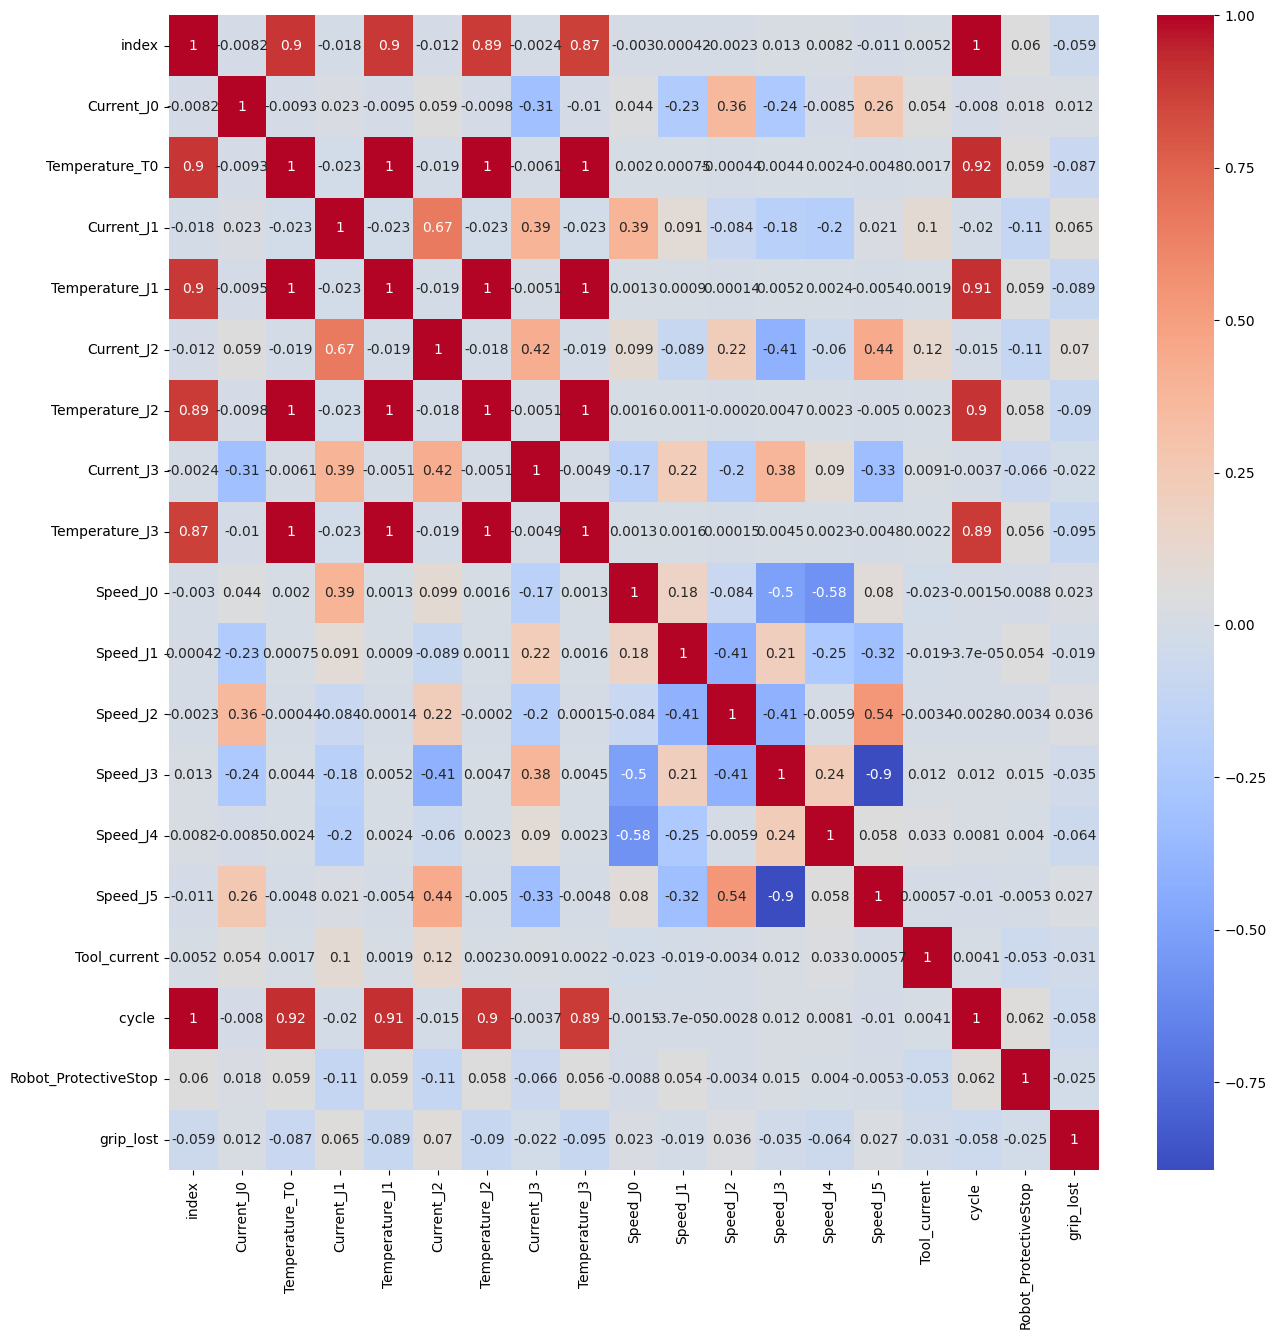

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

 7. Feature Engineering

In [23]:
le=LabelEncoder()

In [24]:
df_clean['grip_lost_encode']=le.fit_transform(df_clean['grip_lost'])

In [25]:
df_clean.head()

,index,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost,grip_lost_encode
0,0,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False,0
1,1,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False,0
2,2,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False,0
3,3,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False,0
4,4,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False,0


In [26]:
X=df_clean.drop(columns=['Current_J3'])

In [27]:
X

,index,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Temperature_J3,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost,grip_lost_encode
0,0,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,32.1250,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False,0
1,1,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,32.1875,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False,0
2,2,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,32.1250,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False,0
3,3,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,32.1250,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False,0
4,4,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,32.1875,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350,7404,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False,0
7351,7405,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False,0
7352,7406,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False,0
7353,7407,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,43.3750,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False,0


In [28]:
y=df_clean['Current_J3']

In [29]:
y

0      -0.998570
1      -0.206097
2      -0.351499
3      -1.209115
4      -2.356471
          ...   
7350   -0.494714
7351   -0.515789
7352   -0.502406
7353   -0.491158
7354   -0.502397
Name: Current_J3, Length: 7355, dtype: float64

8. Feature Selection:

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

In [31]:
# Apply SelectKBest
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top Features Selected:")
print(selected_features)

Top Features Selected:
Index(['Current_J0', 'Current_J1', 'Current_J2', 'Speed_J0', 'Speed_J1',
       'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Robot_ProtectiveStop'],
      dtype='object')


In [32]:
# Feature importance using Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(df_clean.drop('Current_J3', axis=1), df_clean['Current_J3'])
feature_importance = pd.DataFrame({
    'feature': df_clean.drop('Current_J3', axis=1).columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                 feature  importance
5             Current_J2    0.438622
11              Speed_J3    0.253463
10              Speed_J2    0.094449
3             Current_J1    0.082312
13              Speed_J5    0.041804
8               Speed_J0    0.029960
1             Current_J0    0.022960
9               Speed_J1    0.009825
12              Speed_J4    0.008600
14          Tool_current    0.006999
16  Robot_ProtectiveStop    0.002950
0                  index    0.001668
15                cycle     0.001598
7         Temperature_J3    0.001244
6         Temperature_J2    0.001219
4         Temperature_J1    0.001112
2         Temperature_T0    0.001029
17             grip_lost    0.000098
18      grip_lost_encode    0.000088


The feature selection using Kbest and random forest method implies that important features in the dataset are Current_J0, Current_J1,
Current_J2, Speed_J0,Speed_J1,Speed_J2,Speed_J3, Speed_J4, Speed_J5,Robot_ProtectiveStop. A pair plot is used to demonstrate the relations between the features selected using k best and random forest

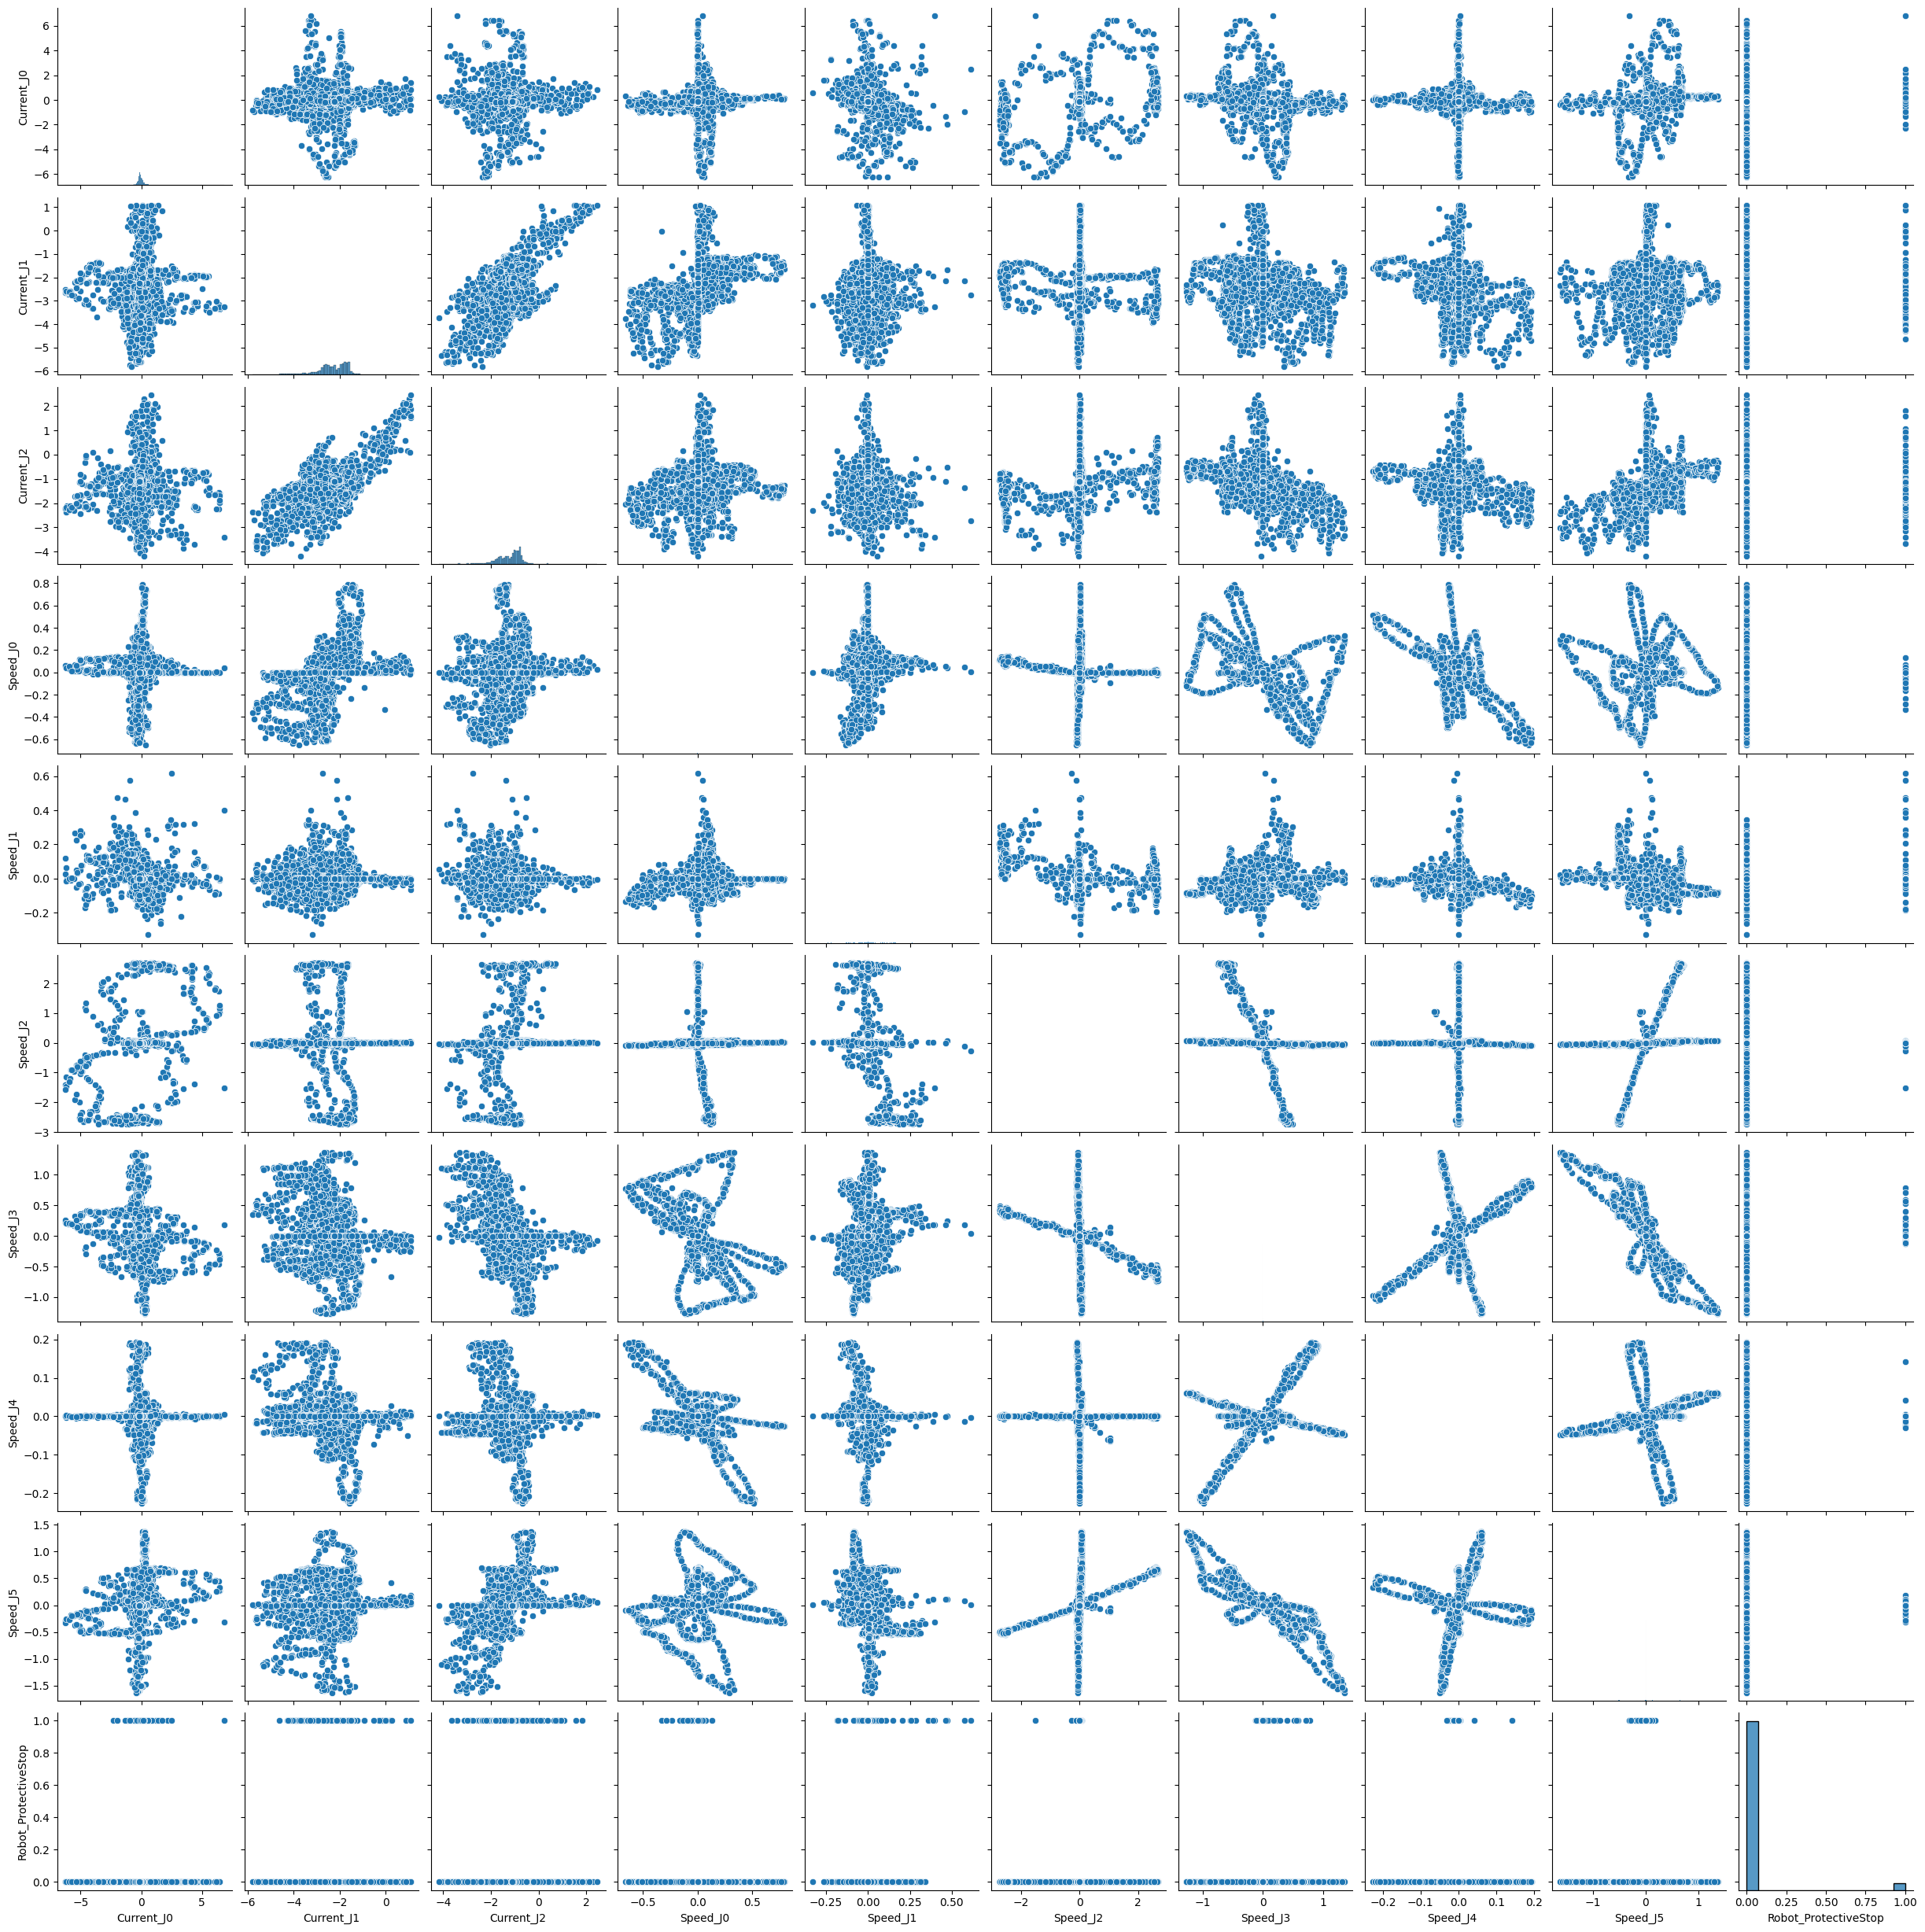

In [33]:
features=['Current_J0', 'Current_J1', 'Current_J2', 'Speed_J0', 'Speed_J1',
       'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Robot_ProtectiveStop']
sns.pairplot(df_clean[features])